# 0 Import

In [2]:
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import scikitplot as skplt

import funcoes_suporte as fs
import feature_engenniring as fe
import data_preparation as dp

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn import neighbors as nh
from sklearn.metrics import log_loss, brier_score_loss

## 0.1 Help Functions

In [4]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao()

## 0.2 Load interim data

In [5]:
x_treino = pickle.load( open( "../data/processed/x_treino.pkl", "rb" ) )
y_treino = pickle.load( open( "../data/interim/y_treino.pkl", 'rb' ) )

x_teste = pickle.load( open( "../data/interim/x_teste.pkl", "rb" ) )
y_teste = pickle.load( open( "../data/interim/y_teste.pkl", 'rb' ) )

x_validacao = pickle.load( open( "../data/interim/x_validacao.pkl", "rb" ) )
y_validacao = pickle.load( open( "../data/interim/y_validacao.pkl", 'rb' ) )

## 0.3 Aplicando Feature Selection

In [6]:
cols_select = pickle.load ( open( "../data/processed/cols_selected.pkl", "rb" ) )

In [7]:
x_teste = x_teste[cols_select]
x_validacao = x_validacao[cols_select]

del cols_select

## 0.4 Aplicando Data FE

In [8]:
df_teste = x_teste.copy()
df_teste['resposta'] = y_teste
df_teste = fe.fe(df_teste)

In [9]:
df_validacao = x_validacao.copy()
df_validacao['resposta'] = y_validacao
df_validacao = fe.fe(df_validacao)

## 0.5 Aplicando Data Preparation

In [10]:
df_teste = dp.data_prep(df_teste)
df_validacao = dp.data_prep(df_validacao)

## 0.6 Separando os dados novamente

In [20]:
y_teste = df_teste['resposta']
x_teste = df_teste.drop(columns = ['resposta'])

y_validacao = df_validacao['resposta']
x_validacao = df_validacao.drop(columns = ['resposta'])

In [21]:
del df_teste, df_validacao

## 1.1 Base Line

In [12]:
dummy = DummyClassifier()
dummy.fit(x_treino,y_treino)

y_proba = dummy.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba))
print("Brier Score:", brier_score_loss(y_teste, y_proba[:, 1]))

Log Loss: 0.371671830558508
Brier Score: 0.10741514942219899


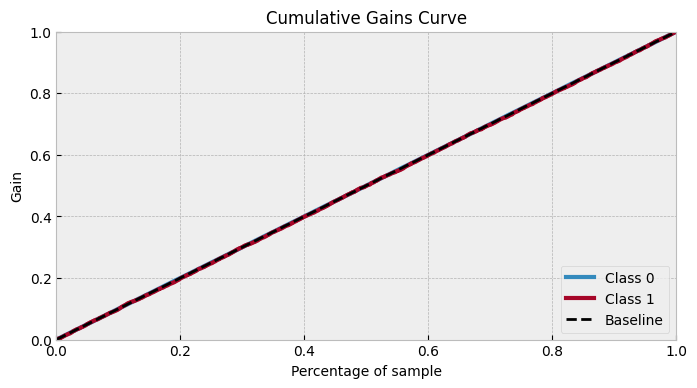

In [16]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba)
    plt.show()

## 1.2 KNN

In [18]:
knn_model = nh.KNeighborsClassifier( n_neighbors= 100)

knn_model.fit( x_treino, y_treino )

y_proba_knn = knn_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_knn))
print("Brier Score:", brier_score_loss(y_teste, y_proba_knn[:, 1]))

Log Loss: 0.2756632146958173
Brier Score: 0.08842331855790928


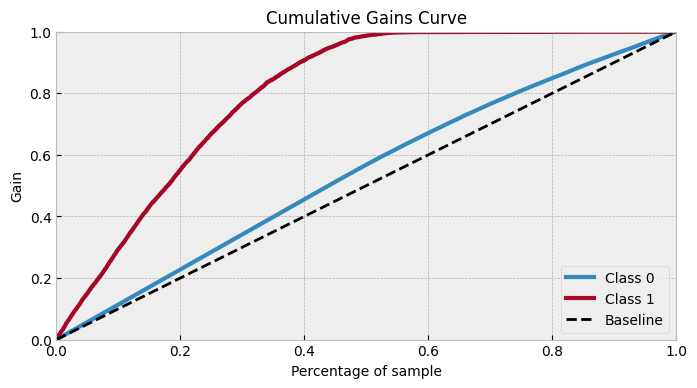

In [23]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_knn)
    plt.show()

# 2 (Treino + Teste) x Validação

## 2.1 Base Line

In [15]:
x_treino_teste = pd.concat([x_treino,x_teste])
y_treino_teste = pd.concat([y_treino,y_teste])

In [16]:
dummy = DummyClassifier()
dummy.fit(x_treino_teste,y_treino_teste)

y_proba_2 = dummy.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_2[:, 1]))

Log Loss: 0.3766439609634703
Brier Score: 0.10932034126154518
